In [134]:
#!pip install astropy
#!pip install sep
import numpy as np
import sep
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline
rcParams['figure.figsize'] = [10., 8.]

#print(astropy.__version__)
#print(sep.__version__)


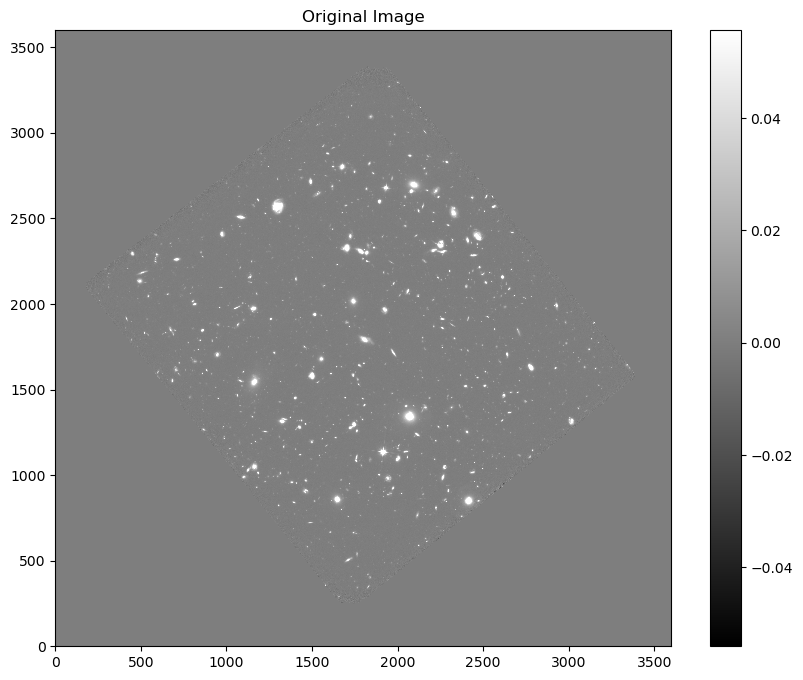

In [135]:
# Read the FITS  image into a 2D numpy array
data, header = fits.getdata("/Users/ayush/Desktop/ASTR 19/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits", header=True)

# Show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.title('Original Image')
plt.show()


Background mean: 0.0, Background RMS: 0.0005398219218477607


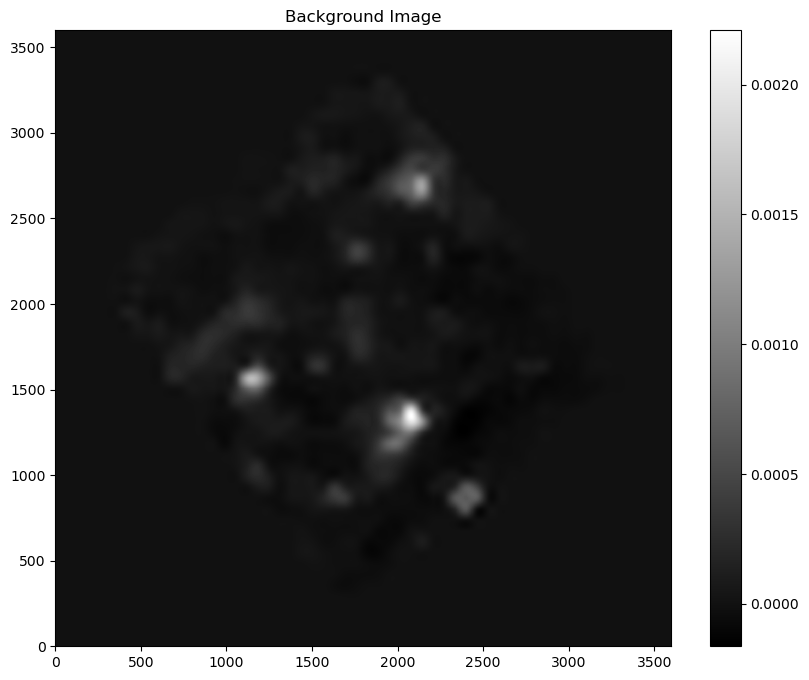

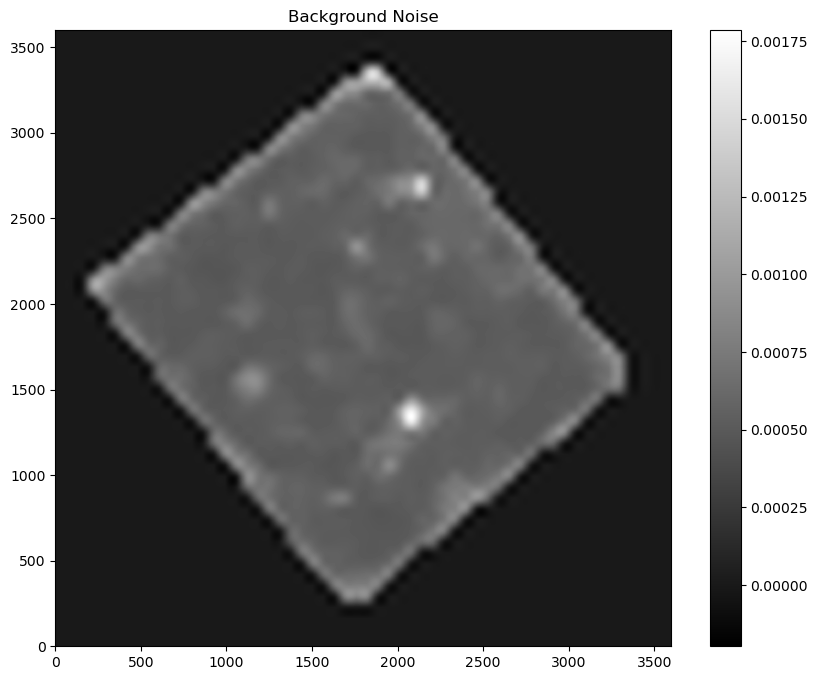

In [136]:
# Measure a spatially varying background
data = data.astype(np.float32)
bkg = sep.Background(data)

# Global mean and RMS of the background
print(f"Background mean: {bkg.globalback}, Background RMS: {bkg.globalrms}")

# Background as a 2D array
bkg_image = bkg.back()
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title('Background Image')
plt.show()

# Background noise as a 2D array
bkg_rms = bkg.rms()
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title('Background Noise')
plt.show()

# Subtract the background from the image
data_sub = data - bkg


Number of objects detected: 8640


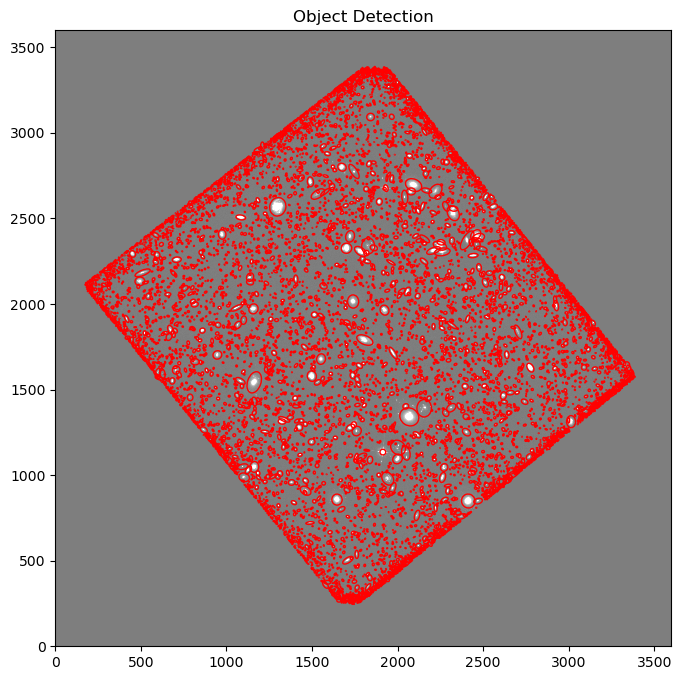

In [137]:
# Run object detection
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

# How many objects were detected?
print(f"Number of objects detected: {len(objects)}")

# Visualize the object locations on the image
from matplotlib.patches import Ellipse

# Plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
ax.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

# Plot ellipses for each detected object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i], height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.title('Object Detection')
plt.show()


/var/folders/kj/qkkwff9d7gl0lvhhg5gg5tyr0000gn/T/ipykernel_67828/3133590488.py:3: RuntimeWarning: invalid value encountered in log10
  m_flux = -2.5*np.log10(flux)


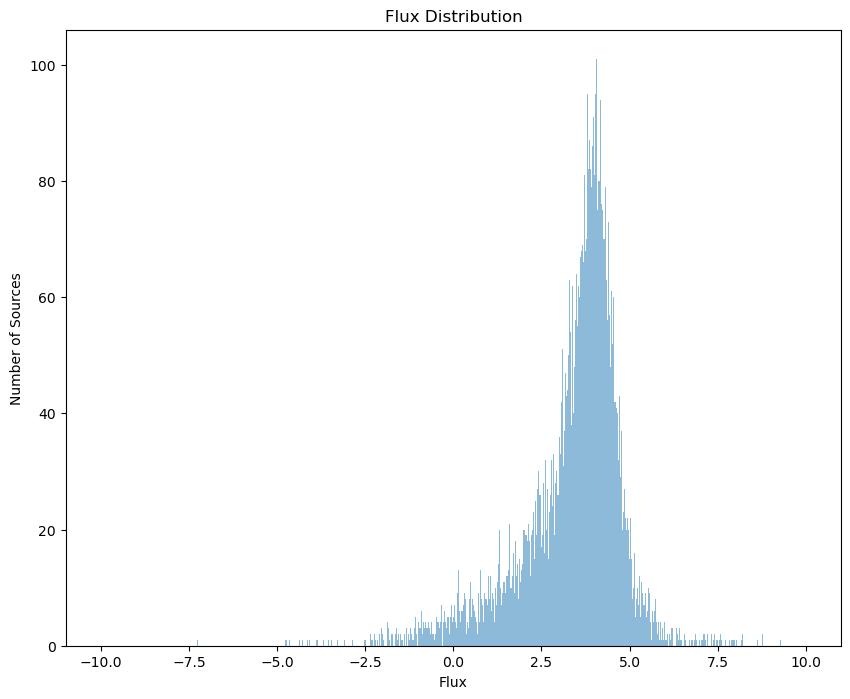

Object 0: Flux = 0.03 ± 0.18
Object 1: Flux = 0.03 ± 0.18
Object 2: Flux = -0.02 ± 0.00
Object 3: Flux = 0.00 ± 0.04
Object 4: Flux = 0.01 ± 0.11
Object 5: Flux = -0.01 ± 0.00
Object 6: Flux = 0.03 ± 0.17
Object 7: Flux = -0.01 ± 0.00
Object 8: Flux = 0.05 ± 0.22
Object 9: Flux = 0.03 ± 0.17


In [138]:
# Perform aperture photometry
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)
m_flux = -2.5*np.log10(flux)
plt.hist(m_flux, range=[-10,10], bins=1000, alpha=0.5)
plt.title('Flux Distribution')
plt.xlabel('Flux')
plt.ylabel('Number of Sources')
plt.savefig("flux_histogram.png")
plt.show()
# Show the first 10 objects' flux and errors
for i in range(10):
    print(f"Object {i}: Flux = {flux[i]:.2f} ± {fluxerr[i]:.2f}")


In [139]:
mean_flux = np.mean(flux)
median_flux = np.median(flux)
std_flux = np.std(flux)
max_flux = np.max(flux)
outlier_index = np.argmax(flux)

print(f"Mean Flux: {mean_flux}, Median Flux: {median_flux}, Std Dev: {std_flux}")
print(f"Largest outlier: Flux={max_flux}, Index={outlier_index}")

# Locate the outlier on the image
outlier_x, outlier_y = objects['x'][outlier_index], objects['y'][outlier_index]
print(f"Outlier position: x={outlier_x}, y={outlier_y}")

Mean Flux: 0.36186200072018937, Median Flux: 0.03095655805023853, Std Dev: 9.24352784277779
Largest outlier: Flux=807.2972835731507, Index=2066
Outlier position: x=1914.2549094866436, y=1134.3164850725645


In [140]:
# Load images
# My attempt at rbg image which i could not get to work

#f105w_data = fits.getdata("/Users/ayush/Desktop/ASTR 19/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")
#f125w_data = fits.getdata("/Users/ayush/Desktop/ASTR 19/hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits")
#f160w_data = fits.getdata("/Users/ayush/Desktop/ASTR 19/hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits")

#f105w_data = f105w_data.byteswap().newbyteorder()
#f125w_data = f125w_data.byteswap().newbyteorder()
#f160w_data = f160w_data.byteswap().newbyteorder()


#plt.imshow(rgb_image, origin='lower')
#plt.title("RGB Image")
#plt.savefig("RGB_image.png")
#plt.show()


# Save the original image as PNG
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.title('Original Image')
plt.savefig('original_image.png')

# Save the background image
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title('Background Image')
plt.savefig('background_image.png')

# Save the background noise image
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title('Background Noise Image')
plt.savefig('background_noise_image.png')

# Save the object detection image
fig, ax = plt.subplots()
ax.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i], height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.title('Object Detection')
plt.savefig('object_detection.png')




